In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plantvillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6063 files belonging to 5 classes.


In [4]:
class_names = dataset.class_names
class_names
n_classes = len(class_names)
print(n_classes)

5


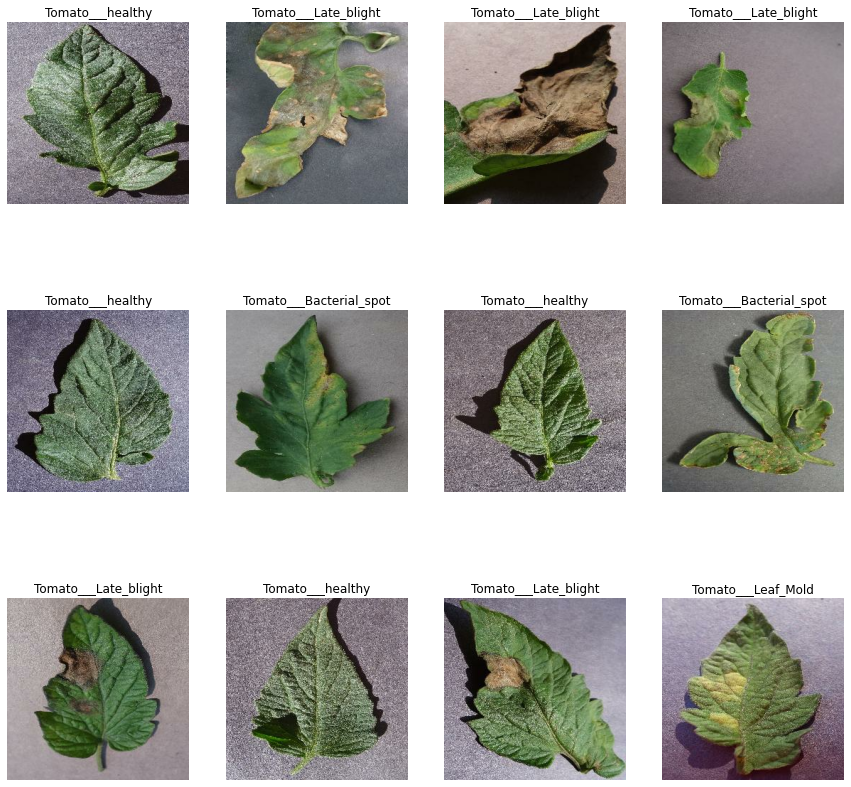

In [5]:
plt.figure(figsize=(15,15))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [6]:
def get_dataset_partitions_tf(ds, train_split = 0.8 , val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.take(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [9]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [10]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [41]:
input_shape = (BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
#     layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax')
    
])

model.build(input_shape = input_shape)

In [39]:
model.build(input_shape = input_shape)

In [42]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_108 (Conv2D)          (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (32, 125, 125, 32)        9248      
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (32, 62, 62, 32)          0         
_________________________________________________________________
conv2d_110 (Conv2D)          (32, 60, 60, 32)        

In [43]:
model.compile(
optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [45]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
152/152 [==============================] - 202s 1s/step - loss: 0.6243 - accuracy: 0.7634 - val_loss: 1.1426 - val_accuracy: 0.5674
Epoch 2/50
152/152 [==============================] - 200s 1s/step - loss: 0.5353 - accuracy: 0.8024 - val_loss: 0.5720 - val_accuracy: 0.7961
Epoch 3/50
152/152 [==============================] - 201s 1s/step - loss: 0.4571 - accuracy: 0.8263 - val_loss: 0.9638 - val_accuracy: 0.7385
Epoch 4/50
152/152 [==============================] - 202s 1s/step - loss: 0.3918 - accuracy: 0.8595 - val_loss: 0.5475 - val_accuracy: 0.8141
Epoch 5/50
152/152 [==============================] - 202s 1s/step - loss: 0.3540 - accuracy: 0.8733 - val_loss: 1.1305 - val_accuracy: 0.6859
Epoch 6/50
152/152 [==============================] - 202s 1s/step - loss: 0.3281 - accuracy: 0.8836 - val_loss: 0.4042 - val_accuracy: 0.8569
Epoch 7/50
152/152 [==============================] - 202s 1s/step - loss: 0.3047 - accuracy: 0.8933 - val_loss: 0.4351 - val_accuracy: 0.8536

In [ ]:
scores = model.evaluate(test_ds)